# Proyecto No 1

##### Paso 1

importar librerias y data

In [1]:
# Importar liberrias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seaborn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Cargar datos

data = pd.DataFrame(
    np.load("proyecto_training_data.npy"),
    columns=[
        "SalePrice",
        "OverallQual",
        "1stFlrSF",
        "TotRmsAbvGrd",
        "YearBuilt",
        "LotFrontage",
    ],
)

In [59]:
a = data['OverallQual']
a

0       7.0
1       6.0
2       7.0
3       7.0
4       8.0
       ... 
1455    6.0
1456    6.0
1457    7.0
1458    5.0
1459    5.0
Name: OverallQual, Length: 1460, dtype: float64

In [60]:
b = data['SalePrice']
b

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

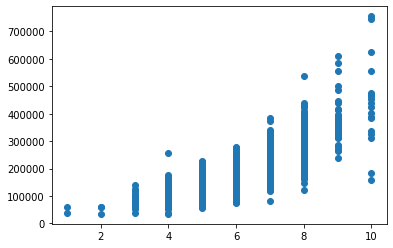

In [61]:
plt.scatter(a,b)

In [62]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=23)
a_train

1290    5.0
793     8.0
83      5.0
432     5.0
929     7.0
       ... 
31      5.0
950     5.0
1064    5.0
742     7.0
595     8.0
Name: OverallQual, Length: 1168, dtype: float64

In [63]:
a_train = np.array(a_train).reshape(-1,1)
b_train = np.array(b_train)

a_test = np.array(a_test).reshape(-1,1)
b_test = np.array(b_test)

In [64]:
b_train

array([180500., 225000., 126500., ..., 154000., 179000., 319000.])

In [65]:
lr = LinearRegression()

lr.fit(a_train, b_train)

LinearRegression()

In [66]:
c = lr.intercept_
c



-102719.34520239232

In [67]:

m = lr.coef_
m

array([46610.81187957])

In [68]:
b_pred_train = lr.predict(a_train)
b_pred_train

array([130334.71419547, 270167.14983419, 130334.71419547, ...,
       130334.71419547, 223556.33795462, 270167.14983419])

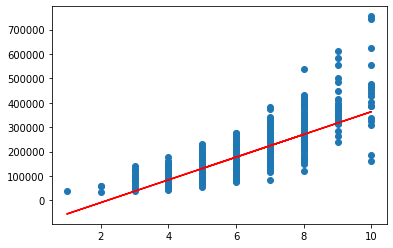

In [69]:
plt.scatter(a_train, b_train)
plt.plot(a_train, b_pred_train, color='red')

In [70]:
score = lr.score(a_train, b_train)
score

0.6257370660149217

##### Paso 3

obtener valores descriptivos de los datos

In [64]:
# calcucular media de variables en dataset

media_data = data.mean(axis=0)

media_data


SalePrice       180921.195890
OverallQual          6.099315
1stFlrSF          1162.626712
TotRmsAbvGrd         6.517808
YearBuilt         1971.267808
LotFrontage         70.049958
dtype: float64

In [65]:
# calcucular valor maximo de variables en dataset

max_data = data.max(axis=0)

max_data

SalePrice       755000.0
OverallQual         10.0
1stFlrSF          4692.0
TotRmsAbvGrd        14.0
YearBuilt         2010.0
LotFrontage        313.0
dtype: float64

In [66]:
# calcucular valor minimo de variables en dataset

min_data = data.min(axis=0)

min_data

SalePrice       34900.0
OverallQual         1.0
1stFlrSF          334.0
TotRmsAbvGrd        2.0
YearBuilt        1872.0
LotFrontage        21.0
dtype: float64

In [67]:
# calcucular rango de variables en dataset

rango_data = max_data - min_data

rango_data

SalePrice       720100.0
OverallQual          9.0
1stFlrSF          4358.0
TotRmsAbvGrd        12.0
YearBuilt          138.0
LotFrontage        292.0
dtype: float64

In [68]:
# calcucular desviacion estandar de variables en dataset

desviacion_data = data.std(axis=0)

desviacion_data

SalePrice       79442.502883
OverallQual         1.382997
1stFlrSF          386.587738
TotRmsAbvGrd        1.625393
YearBuilt          30.202904
LotFrontage        24.284752
dtype: float64

##### Paso 4

Graficar datos

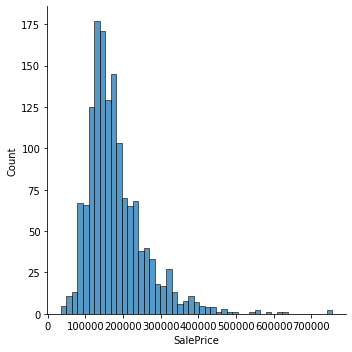

In [69]:
# graficar el precio de venta

seaborn.displot(data=data, x="SalePrice")

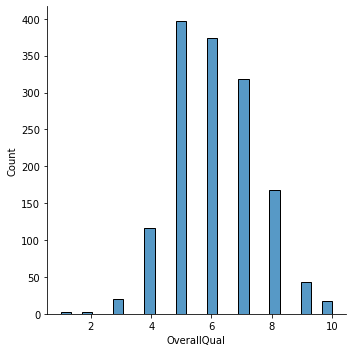

In [70]:
# graficar la calidad general

seaborn.displot(data=data, x="OverallQual")

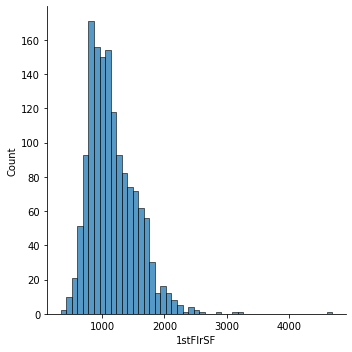

In [71]:
# graficar pies cuadrados del primer piso

seaborn.displot(data=data, x="1stFlrSF")

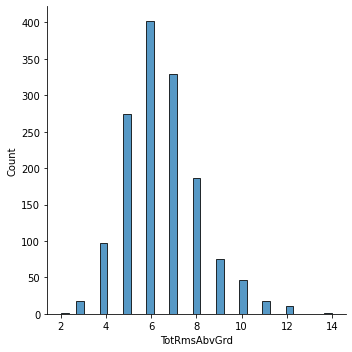

In [72]:
# graficar cuartos totales

seaborn.displot(data=data, x="TotRmsAbvGrd")

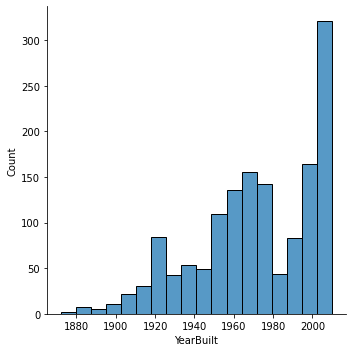

In [73]:
# graficar el año de construccion

seaborn.displot(data=data, x="YearBuilt")

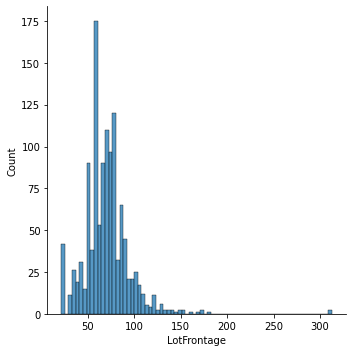

In [74]:
# graficar la cantidad de calle conectada a la propiedad

seaborn.displot(data=data, x="LotFrontage")

##### Paso 5

calcular coeficientes de correlacion

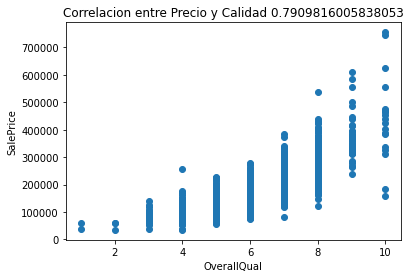

In [75]:
correlacion_precio_calidad = data["SalePrice"].corr(data["OverallQual"])

plt.scatter(data["OverallQual"], data["SalePrice"])
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.title("Correlacion entre Precio y Calidad " + str(correlacion_precio_calidad))
plt.show()

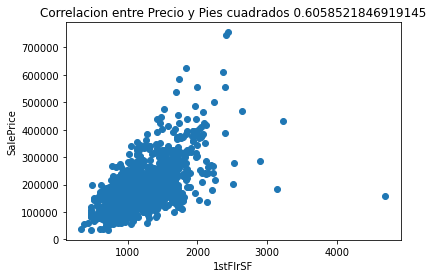

In [76]:
correlacion_precio_pies_cuadrados = data["SalePrice"].corr(data["1stFlrSF"])

plt.scatter(data["1stFlrSF"], data["SalePrice"])
plt.xlabel("1stFlrSF")
plt.ylabel("SalePrice")
plt.title("Correlacion entre Precio y Pies cuadrados " + str(correlacion_precio_pies_cuadrados))
plt.show()

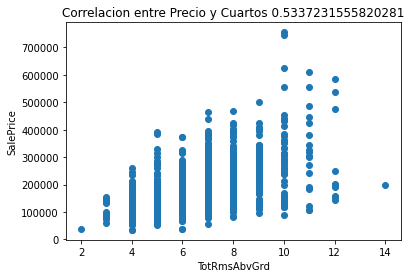

In [77]:
correlacion_precio_cuatos = data["SalePrice"].corr(data["TotRmsAbvGrd"])

plt.scatter(data["TotRmsAbvGrd"], data["SalePrice"])
plt.xlabel("TotRmsAbvGrd")
plt.ylabel("SalePrice")
plt.title("Correlacion entre Precio y Cuartos " + str(correlacion_precio_cuatos))
plt.show()

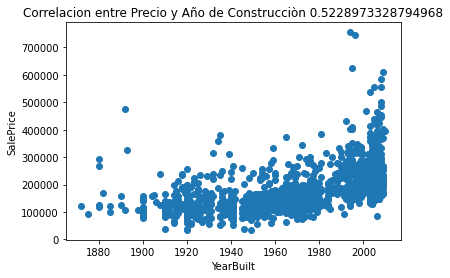

In [78]:
correlacion_precio_anio_construccion = data["SalePrice"].corr(data["YearBuilt"])

plt.scatter(data["YearBuilt"], data["SalePrice"])
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.title("Correlacion entre Precio y Año de Construcciòn " + str(correlacion_precio_anio_construccion))
plt.show()

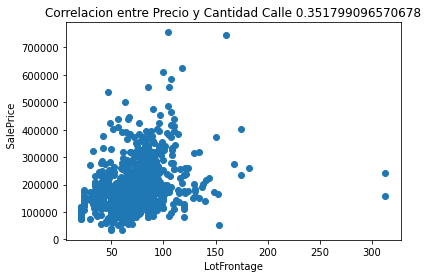

In [79]:
correlacion_precio_cantidad_calle = data["SalePrice"].corr(data["LotFrontage"])

plt.scatter(data["LotFrontage"], data["SalePrice"])
plt.xlabel("LotFrontage")
plt.ylabel("    SalePrice")
plt.title("Correlacion entre Precio y Cantidad Calle " + str(correlacion_precio_cantidad_calle))
plt.show()

Las dos variables con màs relaciòn con el precio son el precio y los pies cuadrados.

##### Paso 6 y 7 Creaciòn de Funciòn

Crear funciòn para entrenar un modelo de regresiòn lineal uni-variable y obtener un modelo predictivo

Crear arrays de varieable dependiente y variables independientes de data de entranamiento y prueba

In [3]:
quality = data['OverallQual']
price = data['SalePrice']
quality_train, quality_test, price_train, price_test = train_test_split(quality, price, test_size=0.2, random_state=23)

In [30]:
size = data['1stFlrSF']
price2 = data['SalePrice']
size_train, size_test, price2_train, price2_test = train_test_split(size, price2, test_size=0.2, random_state=23)

In [4]:
quality_train = np.array(quality_train)
price_train = np.array(price_train)

quality_test = np.array(quality_test)
price_test = np.array(price_test)

In [31]:
size_train = np.array(size_train)
price2_train = np.array(price2_train)

size_test = np.array(size_test)
price2_test = np.array(price2_test)

In [5]:
Quality_train = np.column_stack((quality_train, np.ones(len(quality_train))))

Quality_test = np.column_stack((quality_test, np.ones(len(quality_test))))


In [32]:
Size_train = np.column_stack((size_train, np.ones(len(size_train))))

Size_test = np.column_stack((size_test, np.ones(len(size_test))))

Funciòn para entrenar modelo creado en clase definida

In [12]:
class regresion_lineal():

    # inicializar constructur
    def __init__(self, iteraciones, imprimir_error_cada, learning_rate):
        self.iteraciones = iteraciones
        self.imprimir_error_cada = imprimir_error_cada
        self.learning_rate = learning_rate
        self.beta0 = 0
        self.beta1 = 0
        self.parametros = np.array([self.beta1, self.beta0])
        self.costos = {}
        self.modelo = {}

    # metodo 1: entrenar modelo
    def entrenar_modelo(self, X, Y):
        n = len(X)
        for iteracion in range(self.iteraciones):
            predicciones = np.dot(X, self.parametros)
            costo = np.array(np.sum((Y - predicciones)**2) / (2 * n))
            self.costos[iteracion] = costo
            gradientes = np.sum(np.stack(((predicciones - Y), (predicciones - Y)), axis=1) * X, axis=0) / n
            self.parametros = self.parametros - self.learning_rate * gradientes
            self.modelo[iteracion] = self.parametros
            if iteracion % self.imprimir_error_cada == 0:
                print("iteracion: {}, Costo: {}".format(iteracion, costo))
        return self.costos, self.modelo
        
    # metodo 2: graficar error
    def grafica_error(self, N, eje_x="", eje_y="", titulo=""):
        for iter, (key, value) in enumerate(self.costos.items()):
            if iter % N == 0:
                plt.bar(key, value)
        plt.xlabel(eje_x)
        plt.ylabel(eje_y)
        plt.title(titulo)
        plt.show()

    # metodo 3: graficar modelo
    def grafica_modelo(self, X, Y, N, eje_x="", eje_y="", titulo=""):
        for iter in self.modelo.keys():
            if iter % N == 0:
                y_pred = np.dot(X, self.modelo[iter])
                plt.scatter(X[:,0].reshape(-1,1), Y, color="gray")
                plt.plot(X[:,0].reshape(-1,1), y_pred, label="Iteracion: {}".format(iter))
        plt.legend()
        plt.xlabel(eje_x)
        plt.ylabel(eje_y)
        plt.title(titulo)
        plt.show()

    # metodo 4: calcular predicciones de ambos modelos y el promedio
    def predicciones_modelos(self, X, Y):
        y_pred_modelo_manual = np.dot(X, self.modelo[list(self.modelo)[-1]])
        y_pred_modelo_scikit = LinearRegression().fit(X[:,0].reshape(-1,1), Y).predict(X[:,0].reshape(-1,1))
        y_pred_promedio = (y_pred_modelo_manual + y_pred_modelo_scikit) / 2
        return y_pred_modelo_manual, y_pred_modelo_scikit, y_pred_promedio
    
    # metodo 5: para la data de prueba calcular las predicciones, el error y graficarlo
    def calcular_error_modelos(self, X_test, Y_test):
        y_pred_modelo_manual = np.dot(X_test, self.modelo[list(self.modelo)[-1]])
        y_pred_modelo_scikit = LinearRegression().fit(X_test[:,0].reshape(-1,1), Y_test).predict(X_test[:,0].reshape(-1,1))
        N=len(X_test)
        costo_manual = np.array(np.sum((Y_test - y_pred_modelo_manual)**2) / (2 * N))
        costo_scikit = np.array(np.sum((Y_test - y_pred_modelo_scikit)**2) / (2 * N))
        plt.plot(costo_manual, "o", label="Costo modelo manual {}".format(costo_manual))
        plt.plot(costo_scikit, "o", label="Costo modelo SciKit {}".format(costo_scikit))
        plt.legend()
        plt.show()

Llamar metètodos para ejecutar los pasos de la funciòn en la data de variable X 1 

In [23]:
reg = regresion_lineal(100000,10000,0.001)

In [24]:
reg.entrenar_modelo(Quality_train, price_train)

iteracion: 0, Costo: 19894105574.063354
iteracion: 10000, Costo: 1346453836.0392702
iteracion: 20000, Costo: 1280031013.418462
iteracion: 30000, Costo: 1254287305.5760856
iteracion: 40000, Costo: 1244309733.601209
iteracion: 50000, Costo: 1240442693.8133357
iteracion: 60000, Costo: 1238943932.716082
iteracion: 70000, Costo: 1238363053.0381215
iteracion: 80000, Costo: 1238137919.625674
iteracion: 90000, Costo: 1238050663.9420564


({0: array(1.98941056e+10),
  1: array(1.84461109e+10),
  2: array(1.71122096e+10),
  3: array(1.58834117e+10),
  4: array(1.47514356e+10),
  5: array(1.3708652e+10),
  6: array(1.2748033e+10),
  7: array(1.18631045e+10),
  8: array(1.10479022e+10),
  9: array(1.02969322e+10),
  10: array(9.60513322e+09),
  11: array(8.9678428e+09),
  12: array(8.38076595e+09),
  13: array(7.83994604e+09),
  14: array(7.34173825e+09),
  15: array(6.88278493e+09),
  16: array(6.45999299e+09),
  17: array(6.07051309e+09),
  18: array(5.71172039e+09),
  19: array(5.38119687e+09),
  20: array(5.07671504e+09),
  21: array(4.79622294e+09),
  22: array(4.53783029e+09),
  23: array(4.29979574e+09),
  24: array(4.08051517e+09),
  25: array(3.87851084e+09),
  26: array(3.69242148e+09),
  27: array(3.52099304e+09),
  28: array(3.36307032e+09),
  29: array(3.21758912e+09),
  30: array(3.08356911e+09),
  31: array(2.9601072e+09),
  32: array(2.84637145e+09),
  33: array(2.7415955e+09),
  34: array(2.64507334e+09),


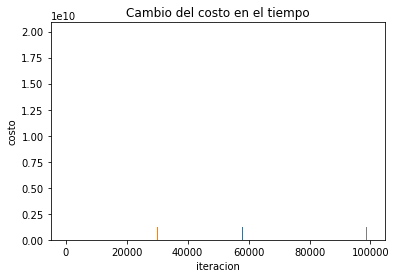

In [25]:
reg.grafica_error(100, "iteracion", "costo", "Cambio del costo en el tiempo")

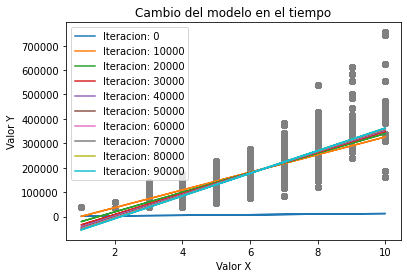

In [27]:
reg.grafica_modelo(Quality_train, price_train, 10000, "Valor X", "Valor Y", "Cambio del modelo en el tiempo")

In [28]:
reg.predicciones_modelos(Quality_train, price_train)

(array([130541.87860452, 269935.19974941, 130541.87860452, ...,
        130541.87860452, 223470.75936778, 269935.19974941]),
 array([130334.71419547, 270167.14983419, 130334.71419547, ...,
        130334.71419547, 223556.33795462, 270167.14983419]),
 array([130438.2964   , 270051.1747918, 130438.2964   , ...,
        130438.2964   , 223513.5486612, 270051.1747918]))

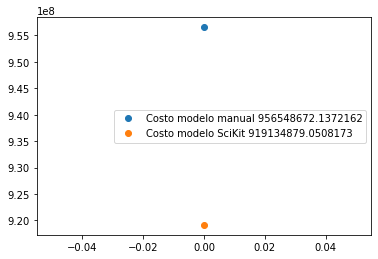

In [29]:
reg.calcular_error_modelos(Quality_test, price_test)

Llamar metètodos para ejecutar los pasos de la funciòn en la data de variable X 2

Crear arrays de varieable dependiente y variables independientes de data de entranamiento y prueba

In [53]:
reg2 = regresion_lineal(100000,10000,0.0000001)

In [54]:
reg2.entrenar_modelo(Size_train, price2_train)

iteracion: 0, Costo: 19894105574.063354
iteracion: 10000, Costo: 2193195279.330756
iteracion: 20000, Costo: 2193177876.852048
iteracion: 30000, Costo: 2193160478.041682
iteracion: 40000, Costo: 2193143082.8988843
iteracion: 50000, Costo: 2193125691.4228826
iteracion: 60000, Costo: 2193108303.612904
iteracion: 70000, Costo: 2193090919.468176
iteracion: 80000, Costo: 2193073538.9879246
iteracion: 90000, Costo: 2193056162.171378


({0: array(1.98941056e+10),
  1: array(1.49407951e+10),
  2: array(1.1373589e+10),
  3: array(8.80460819e+09),
  4: array(6.95451539e+09),
  5: array(5.62214133e+09),
  6: array(4.66261074e+09),
  7: array(3.97158937e+09),
  8: array(3.47393922e+09),
  9: array(3.11554847e+09),
  10: array(2.85744762e+09),
  11: array(2.67157214e+09),
  12: array(2.53771092e+09),
  13: array(2.44130862e+09),
  14: array(2.37188295e+09),
  15: array(2.32188494e+09),
  16: array(2.28587807e+09),
  17: array(2.25994714e+09),
  18: array(2.24127257e+09),
  19: array(2.22782377e+09),
  20: array(2.2181384e+09),
  21: array(2.21116333e+09),
  22: array(2.20614012e+09),
  23: array(2.20252257e+09),
  24: array(2.19991734e+09),
  25: array(2.19804113e+09),
  26: array(2.19668996e+09),
  27: array(2.19571688e+09),
  28: array(2.19501611e+09),
  29: array(2.19451143e+09),
  30: array(2.19414798e+09),
  31: array(2.19388624e+09),
  32: array(2.19369774e+09),
  33: array(2.19356199e+09),
  34: array(2.19346422e+09

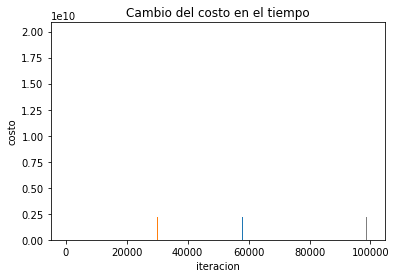

In [55]:
reg2.grafica_error(100, "iteracion", "costo", "Cambio del costo en el tiempo")

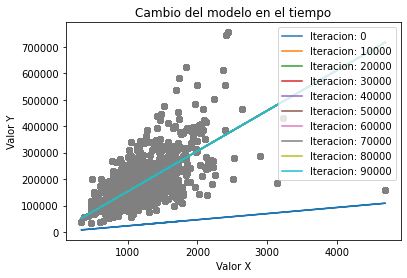

In [56]:
reg2.grafica_modelo(Size_train, price2_train, 10000, "Valor X", "Valor Y", "Cambio del modelo en el tiempo")

In [57]:
reg2.predicciones_modelos(Size_train, price2_train)

(array([176177.857718  , 228774.03611224, 162875.91725201, ...,
        176483.64945285, 206298.34360074, 279229.67236252]),
 array([180701.14175206, 222840.80000895, 170043.72818128, ...,
        180946.13976518, 204833.44604452, 263265.47217399]),
 array([178439.49973503, 225807.41806059, 166459.82271664, ...,
        178714.89460901, 205565.89482263, 271247.57226826]))

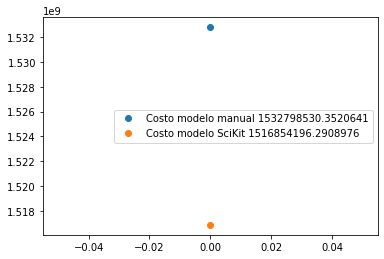

In [58]:
reg2.calcular_error_modelos(Size_test, price2_test)